Goal:
Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

Part One: Understanding the Background and Data
TASK: Read this article: Be Suspicious Of Online Movie Ratings, Especially Fandango’s

TASK: Import any libraries you think you will use:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TASK: Run the cell below to read in the fandango_scrape.csv file

In [46]:
fandango= pd.read_csv('fandango_scrape.csv')

In [61]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


TASK: Explore the DataFrame Properties and Head.

In [47]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [48]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [49]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.

<Axes: xlabel='RATING', ylabel='VOTES'>

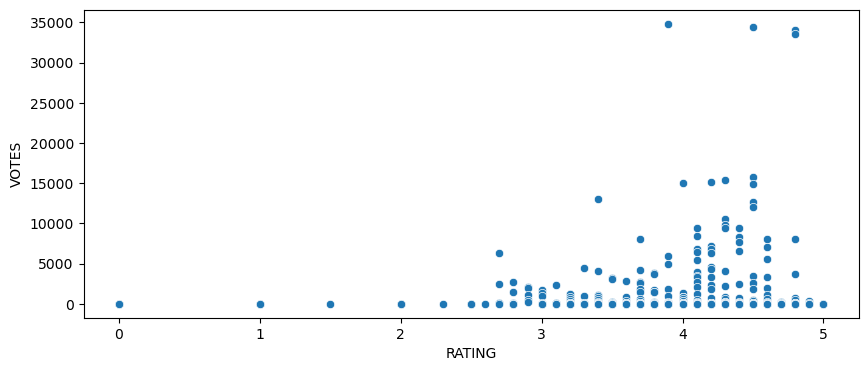

In [50]:
plt.figure(figsize =(10,4), dpi=100)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')


TASK: Calculate the correlation between the columns:

In [51]:
fandango.drop('FILM',axis=1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


TASK: Assuming that every row in the FILM title column has the same format:

Film Title Name (Year)
Create a new column that is able to strip the year from the title strings and set this new column as YEAR

In [52]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [53]:
fandango['YEAR']

0      2015)
1      2015)
2      2015)
3      2015)
4      2015)
       ...  
499    2015)
500    2015)
501    2015)
502    1964)
503    2012)
Name: YEAR, Length: 504, dtype: object

TASK: How many movies are in the Fandango DataFrame per year?

In [54]:
fandango.value_counts()

FILM                                       STARS  RATING  VOTES  YEAR 
 Like Sunday, Like Rain (2015)             4.0    3.7     10     2015)    1
Selam Bahara Yolculuk (2015)               0.0    0.0     0      2015)    1
Six Dance Lessons in Six Weeks (2014)      3.0    3.0     7      2014)    1
Sinister 2 (2015)                          3.5    3.3     973    2015)    1
She's Lost Control (2015)                  5.0    5.0     2      2015)    1
                                                                         ..
Glass Chin (2015)                          0.0    0.0     0      2015)    1
Girlhood (2015)                            4.0    3.5     10     2015)    1
Gett: The Trial of Viviane Amsalem (2015)  3.5    3.5     59     2015)    1
Get Hard (2015)                            4.0    3.9     5933   2015)    1
Zombeavers (2015)                          4.0    3.8     21     2015)    1
Name: count, Length: 504, dtype: int64

In [55]:
fandango['YEAR'].value_counts()

YEAR
2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: count, dtype: int64

TASK: Visualize the count of movies per year with a plot:

<Axes: xlabel='YEAR', ylabel='count'>

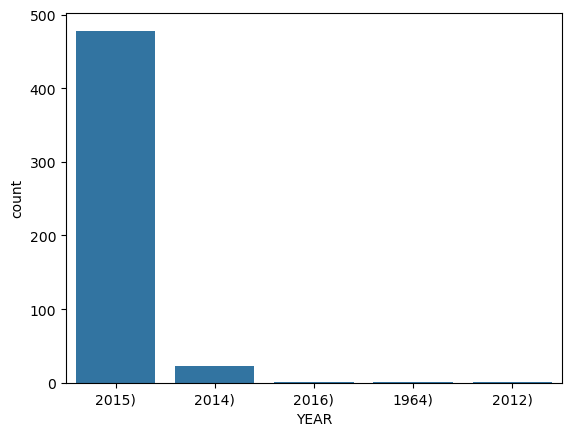

In [56]:
sns.countplot(data=fandango, x='YEAR')

TASK: What are the 10 movies with the highest number of votes?

In [57]:
fandango.sort_values('VOTES', ascending =False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


TASK: How many movies have zero votes?

In [58]:
(fandango['VOTES']==0).sum()

69

TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.



In [59]:
fan_review=fandango[fandango['VOTES']>0]

In [62]:
fan_review

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015)
431,The Intern (2015),5.0,5.0,1,2015)
432,The Park Bench (2015),5.0,5.0,1,2015)
433,The Wanted 18 (2015),5.0,5.0,1,2015)


As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.

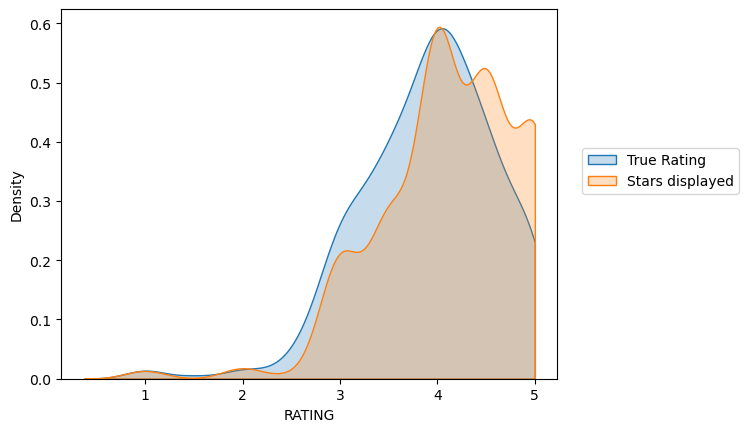

In [63]:
sns.kdeplot(data=fan_review,x='RATING',clip=(0,5),fill=True,label='True Rating')
sns.kdeplot(data=fan_review,x='STARS',clip=(0,5),fill=True,label='Stars displayed')
plt.legend(loc=(1.05,0.5))

TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.



In [64]:
fan_review = fan_review.copy() 
fan_review['STARDIFF']=fan_review['STARS']-fan_review['RATING']
fan_review['STARDIFF']=fan_review['STARDIFF'].round(2)

In [65]:
fan_review

,FILM,STARS,RATING,VOTES,YEAR,STARDIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


C:\Users\RIVU\AppData\Local\Temp\ipykernel_51136\1481807040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_review,x='STARDIFF', palette='magma')


<Axes: xlabel='STARDIFF', ylabel='count'>

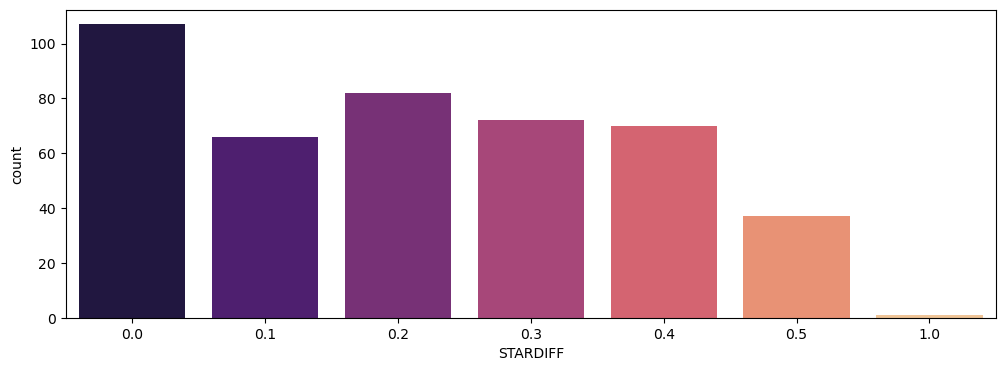

In [73]:
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(data=fan_review,x='STARDIFF', palette='magma')

TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [80]:
fan_review[fan_review['STARDIFF']==1] 

,FILM,STARS,RATING,VOTES,YEAR,STARDIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


TASK: Read in the "all_sites_scores.csv" file by running the cell below

In [81]:
allsites=pd.read_csv('all_sites_scores.csv')

TASK: Explore the DataFrame columns, info, description.

In [83]:
allsites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [84]:
allsites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [85]:
allsites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [86]:
allsites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

(0.0, 120.0)

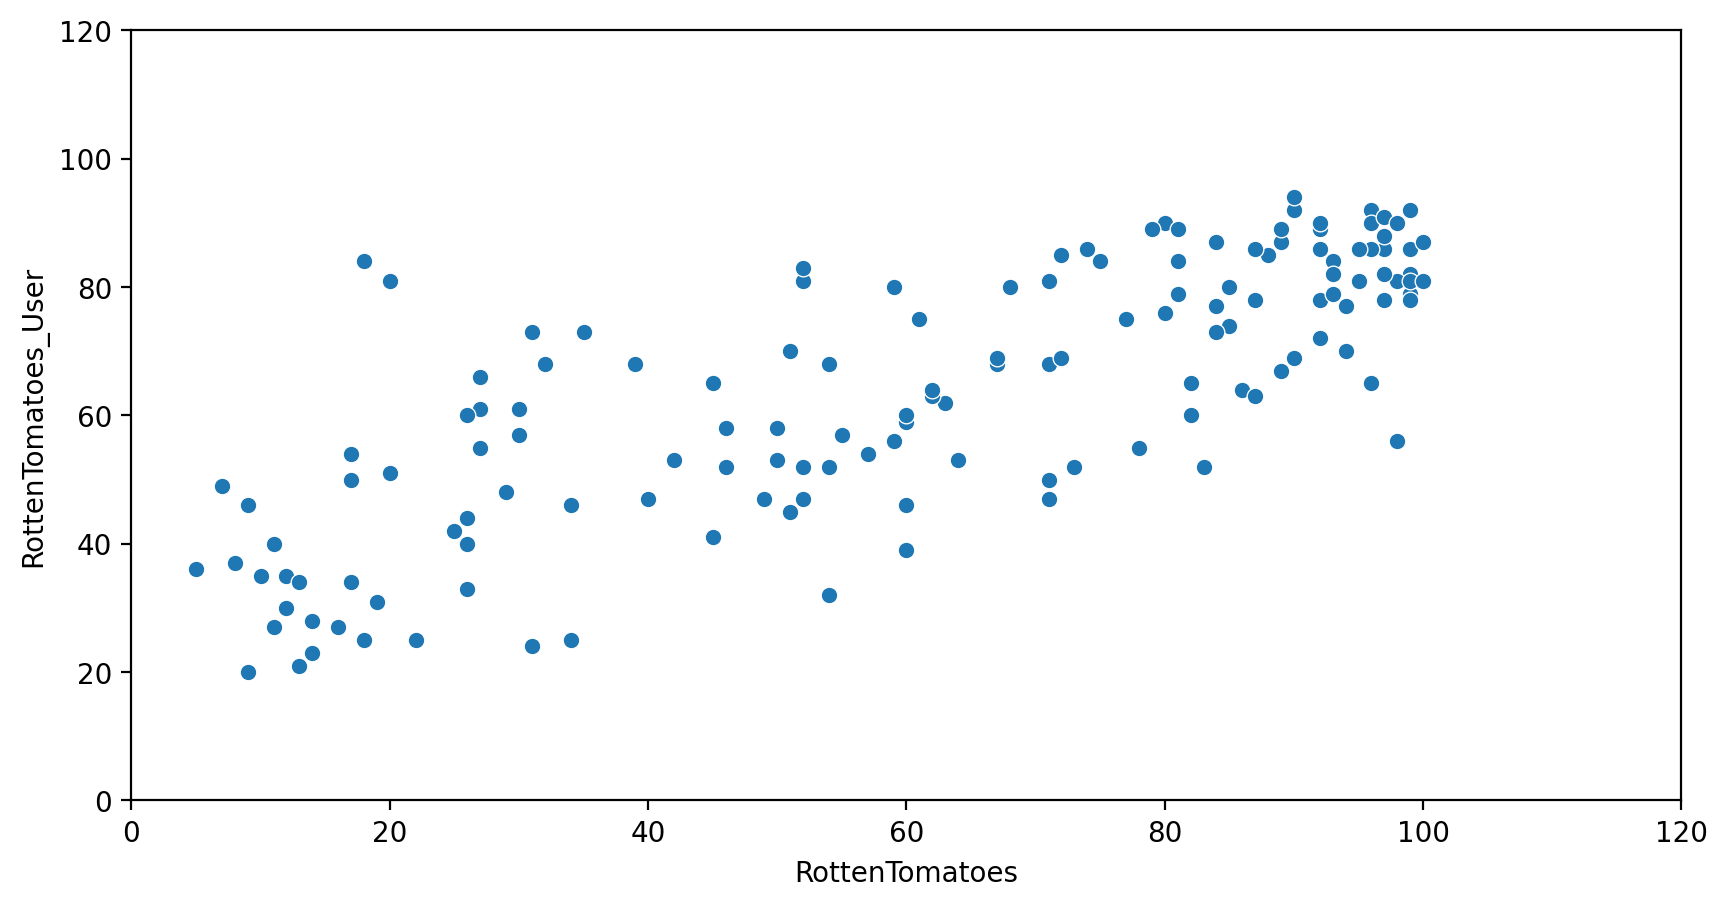

In [96]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=allsites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,120)
plt.ylim(0,120)

TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User

In [97]:
allsites['RTDIFF'] =allsites['RottenTomatoes']- allsites['RottenTomatoes_User']

In [98]:
allsites['RTDIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RTDIFF, Length: 146, dtype: int64

TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [99]:
allsites['RTDIFF'].apply(abs).mean()

15.095890410958905

TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

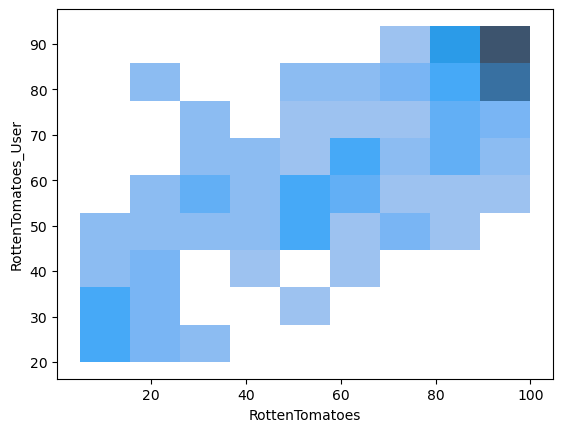

In [101]:
sns.histplot(data=allsites,x='RottenTomatoes',y='RottenTomatoes_User')

Text(0.5, 1.0, 'Distribution of the differences between RT Critics Score and RT User Score')

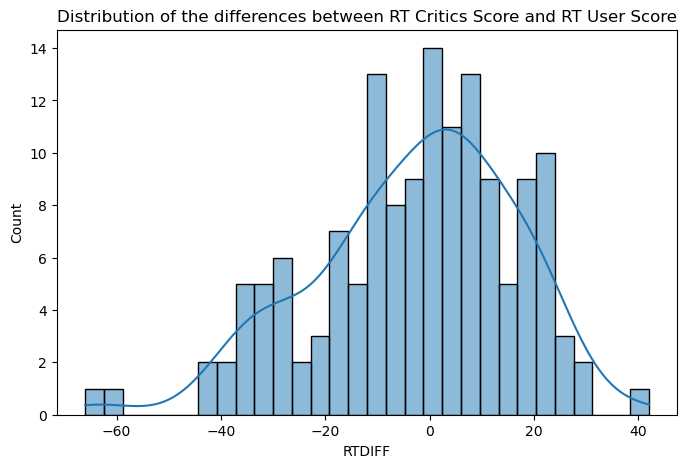

In [119]:
plt.figure(figsize=(8,5),dpi=100)
sns.histplot(data=allsites, x='RTDIFF',kde=True,bins=30)
plt.title("Distribution of the differences between RT Critics Score and RT User Score")

TASK: Now create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

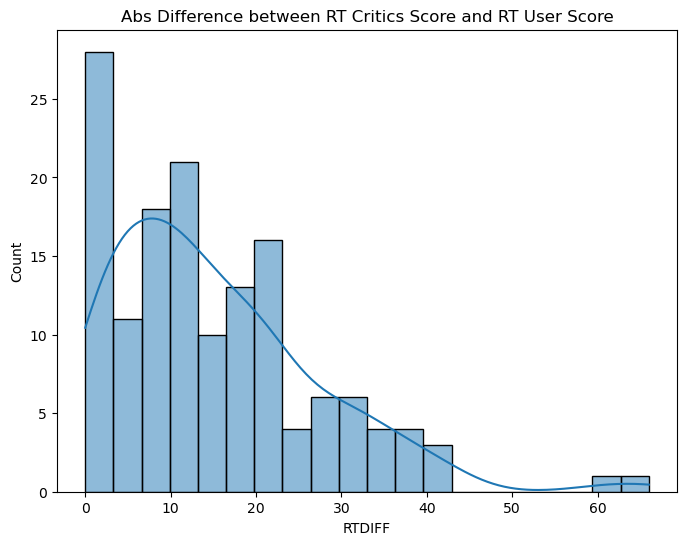

In [122]:
plt.figure(figsize=(8,6),dpi=100)
sns.histplot(data=allsites['RTDIFF'].apply(abs),kde=True,bins=20)
plt.title("Abs Difference between RT Critics Score and RT User Score");

TASK: What are the top 5 movies users rated higher than critics on average:

In [130]:
allsites.sort_values('RTDIFF',ascending=True)[:5][['RottenTomatoes','RottenTomatoes_User','RTDIFF']]

,RottenTomatoes,RottenTomatoes_User,RTDIFF
3,18,84,-66
85,20,81,-61
134,31,73,-42
105,7,49,-42
125,27,66,-39


TASK: Now show the top 5 movies critics scores higher than users on average.

In [132]:
allsites.sort_values('RTDIFF',ascending=False)[:5][['RottenTomatoes','RottenTomatoes_User','RTDIFF']]

,RottenTomatoes,RottenTomatoes_User,RTDIFF
69,98,56,42
112,96,65,31
115,83,52,31
145,87,63,24
37,71,47,24


TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

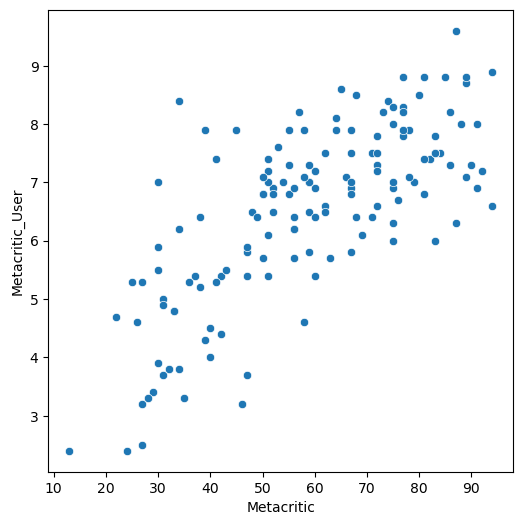

In [135]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(data=allsites,x='Metacritic',y='Metacritic_User')

TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

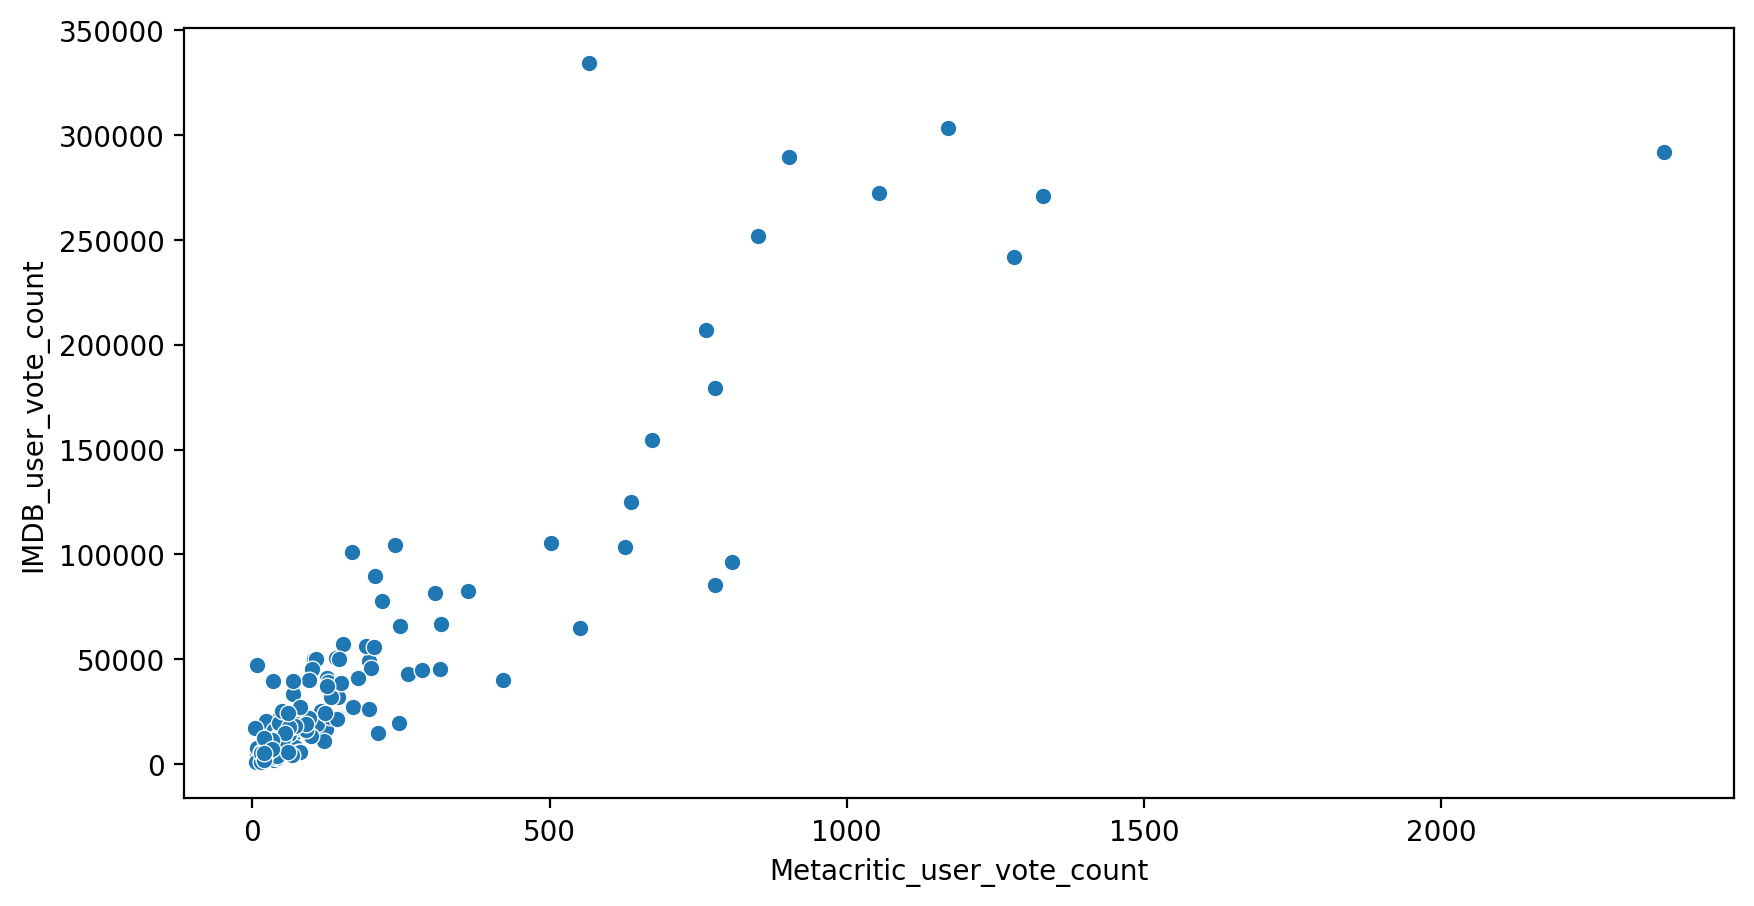

In [137]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=allsites,x='Metacritic_user_vote_count', y='IMDB_user_vote_count')


TASK: What movie has the highest IMDB user vote count?

In [138]:
allsites.sort_values('IMDB_user_vote_count',ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


TASK: What movie has the highest Metacritic User Vote count?

In [139]:
allsites.sort_values('Metacritic_user_vote_count',ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an inner merge to merge together both DataFrames based on the FILM columns.


In [152]:
df=pd.merge(fandango,allsites, how='inner',on='FILM')

In [153]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015),93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015),95,86,86,7.3,7.4,14,696,9


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RTDIFF                      145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [155]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [156]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.

In [157]:
df['RTNorm']=np.round(df['RottenTomatoes']/20,1)
df['RTUNorm']=np.round(df['RottenTomatoes_User']/20,1)

In [158]:
df['MetaNorm']=np.round(df['Metacritic']/20,1)
df['MetaUNorm']=np.round(df['Metacritic_User']/2,1)

In [159]:
df['IMDBNorm']=np.round(df['IMDB']/2,1)

In [160]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015),93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015),95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [161]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RTDIFF,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [162]:
norm=df[['STARS','RATING','VOTES','RTNorm','RTUNorm','MetaNorm','MetaUNorm','IMDBNorm']]

In [163]:
norm

,STARS,RATING,VOTES,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm
0,4.0,3.9,34846,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,34390,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,34085,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,33538,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,15749,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,3.5,3.5,41,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,38,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,38,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,36,4.8,4.3,4.3,3.6,3.7


In [164]:
norm.head()

,STARS,RATING,VOTES,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm
0,4.0,3.9,34846,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,34390,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,34085,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,33538,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,15749,4.9,4.5,4.7,4.4,4.3


TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.

In [188]:
def move_legend(ax, new_loc, **kws):
    oldlegend=ax.get_legend()
    handles= oldlegend.legend_handles
    labels= [t.get_text() for t in oldlegend.get_texts()]
    title=oldlegend.get_title().get_text()
    ax.legend(handles,labels, loc=new_loc, title=title, **kws)

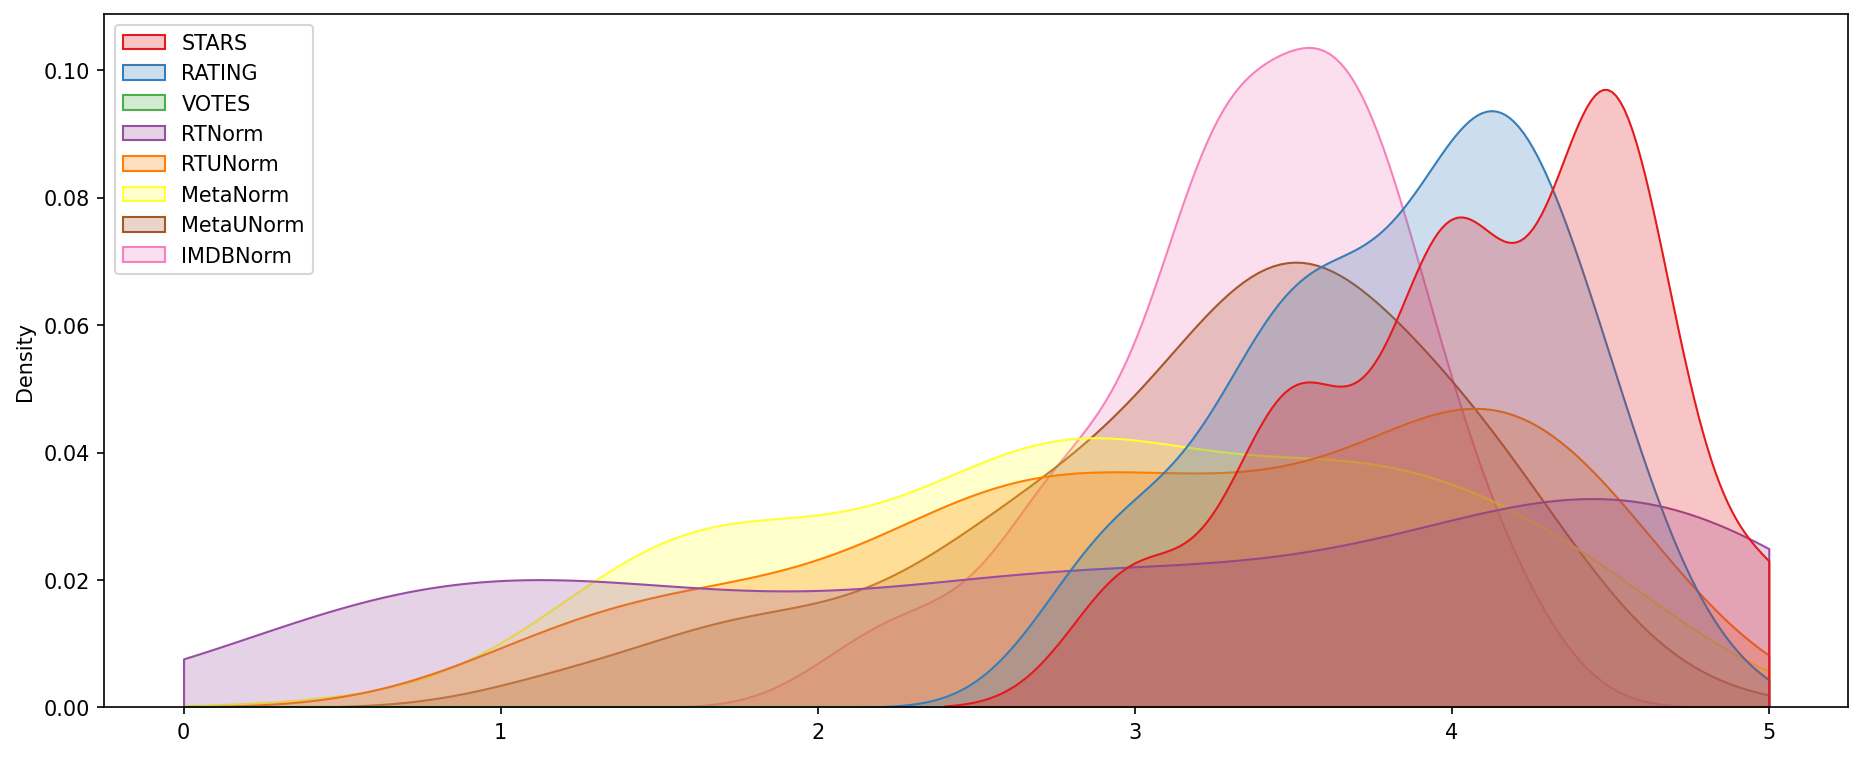

In [189]:
fig,ax= plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm, clip=[0,5],fill=True, palette='Set1',ax=ax)
move_legend(ax, "upper left")


TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.


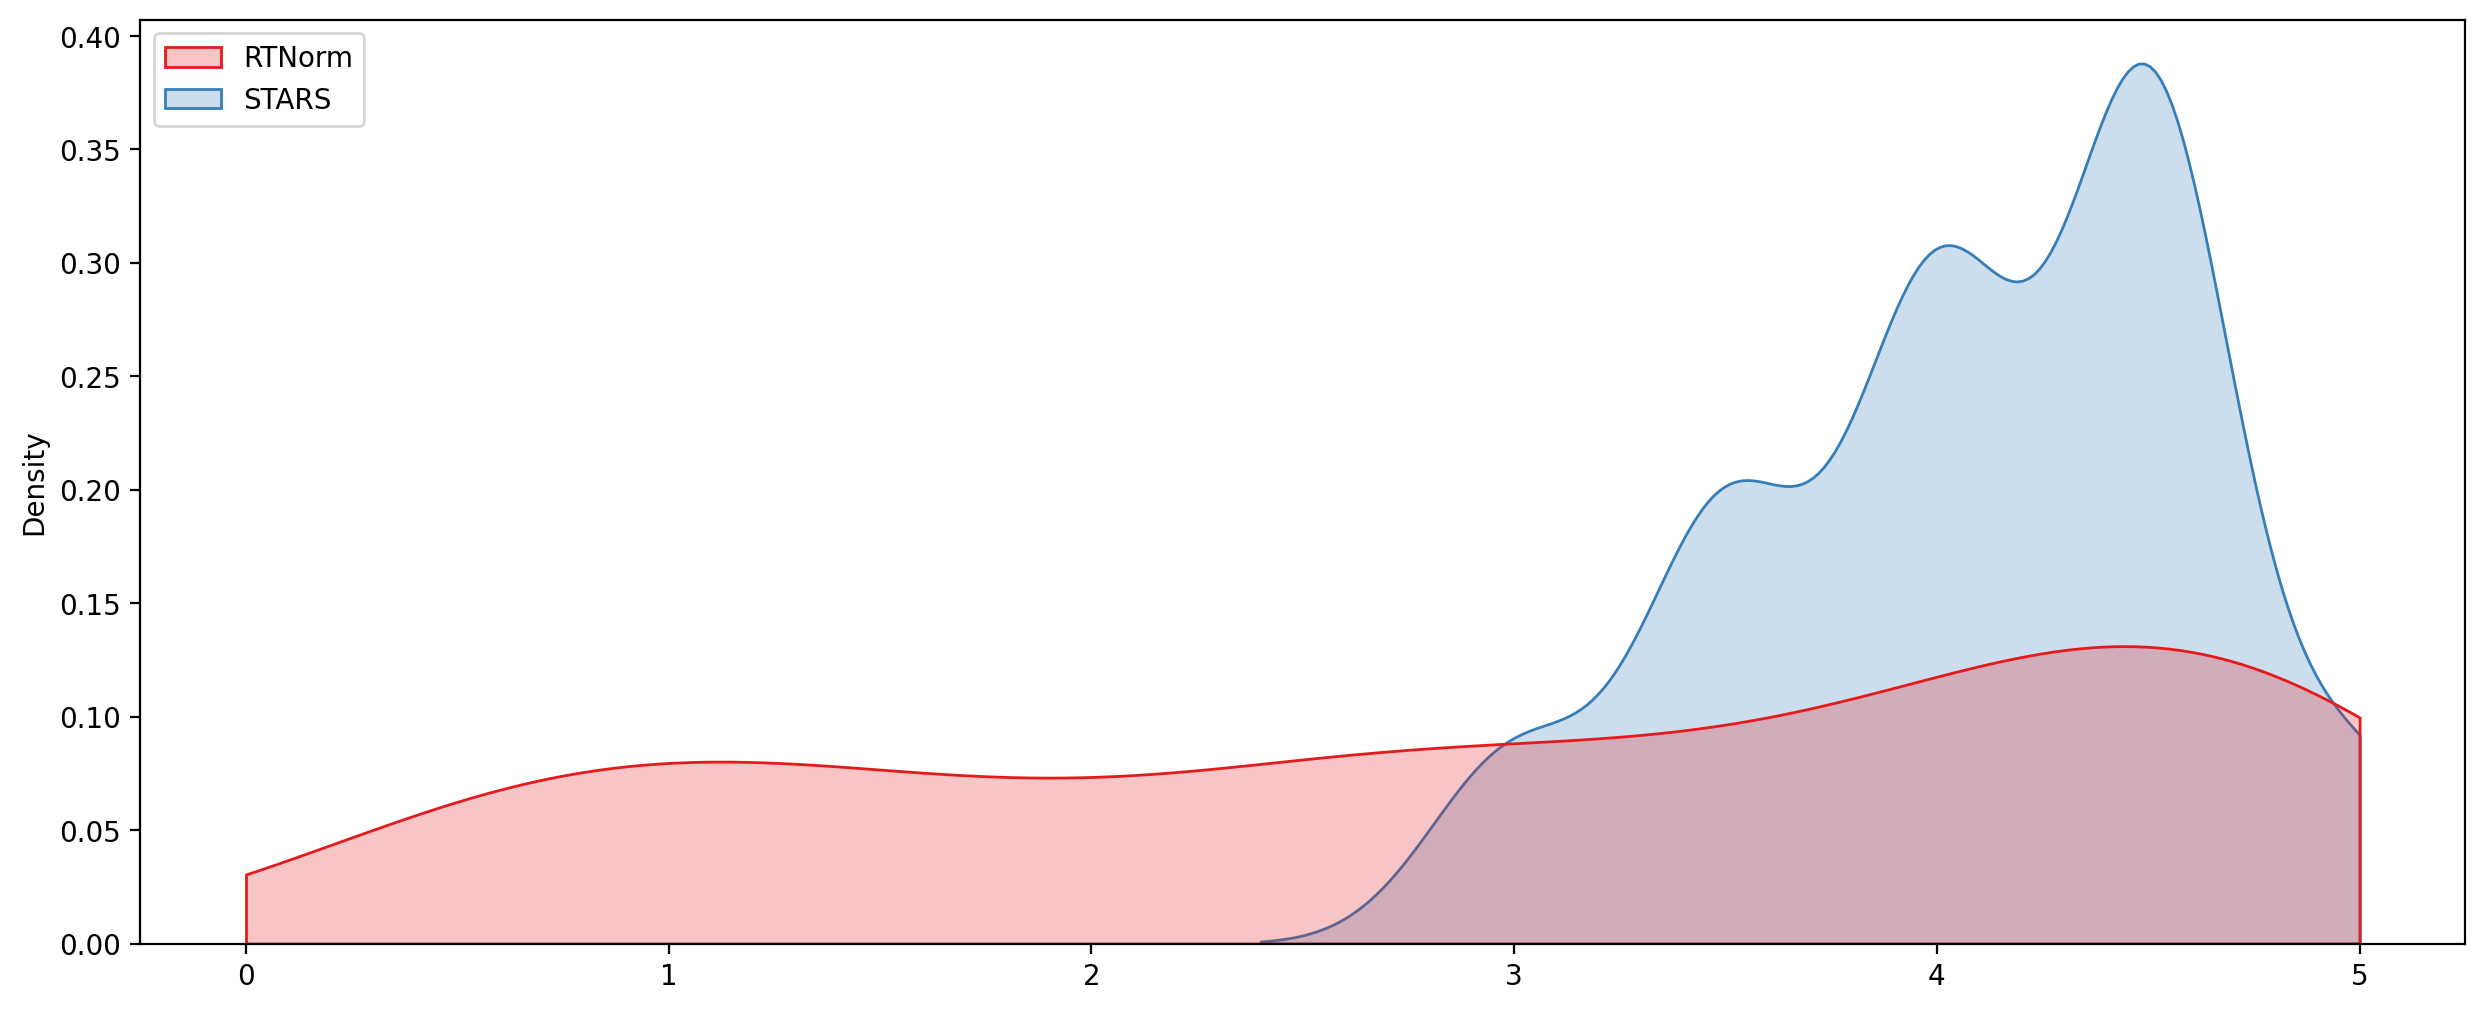

In [192]:
fig, ax =plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm[['RTNorm','STARS']], clip=[0,5], fill=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

In [209]:
norm=norm.drop('VOTES',axis=1)

In [210]:
norm

,STARS,RATING,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


OPTIONAL TASK: Create a histplot comparing all normalized scores.

<Axes: ylabel='Count'>

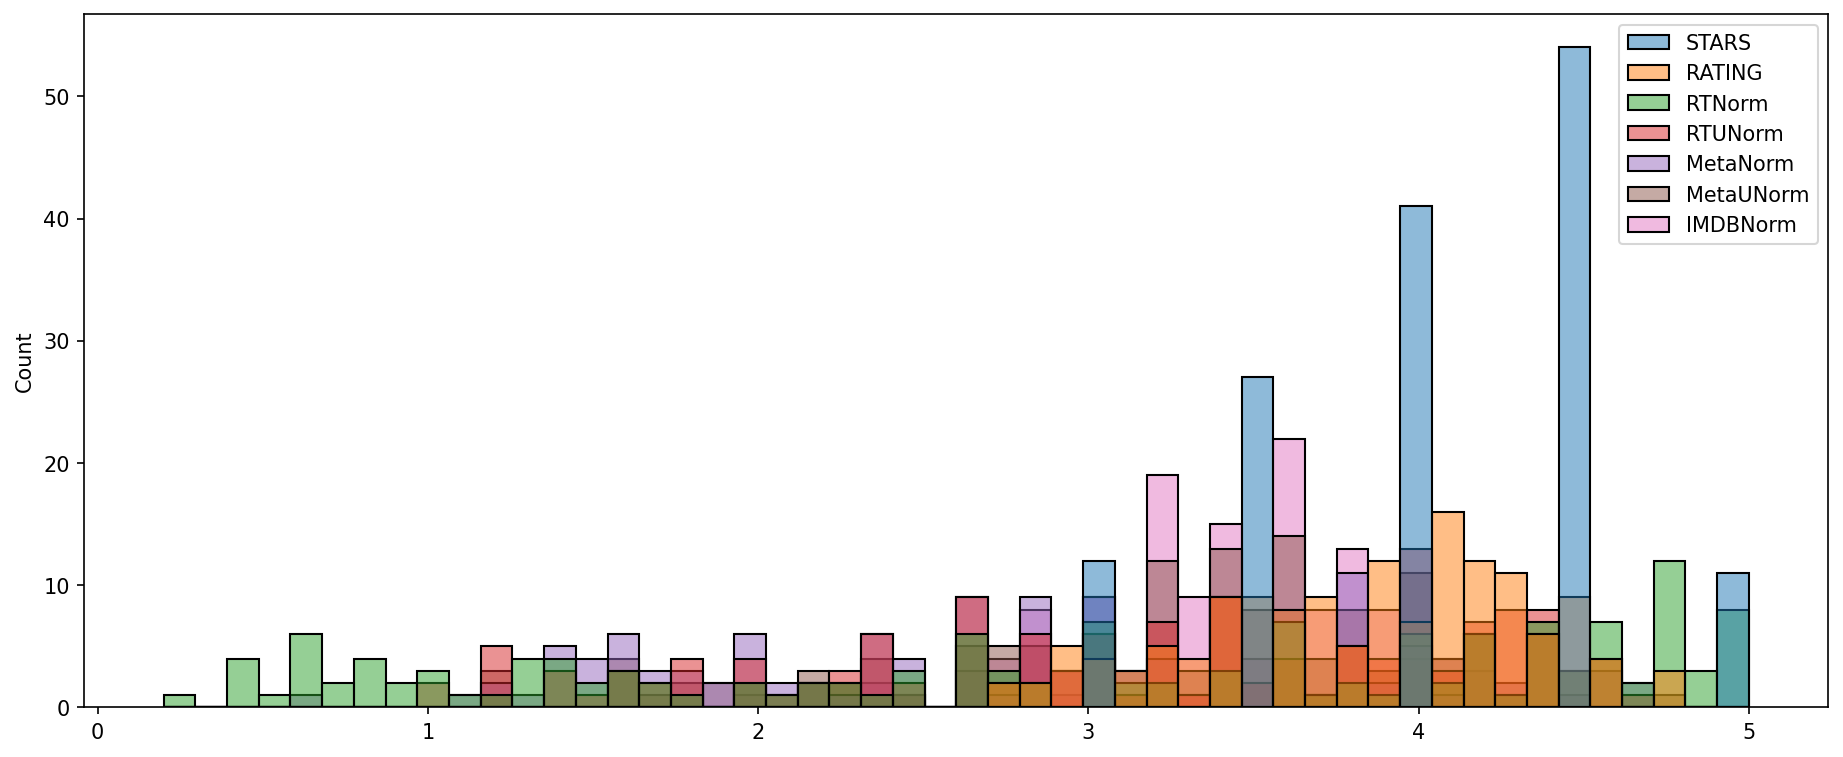

In [211]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm,bins=50)

TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.

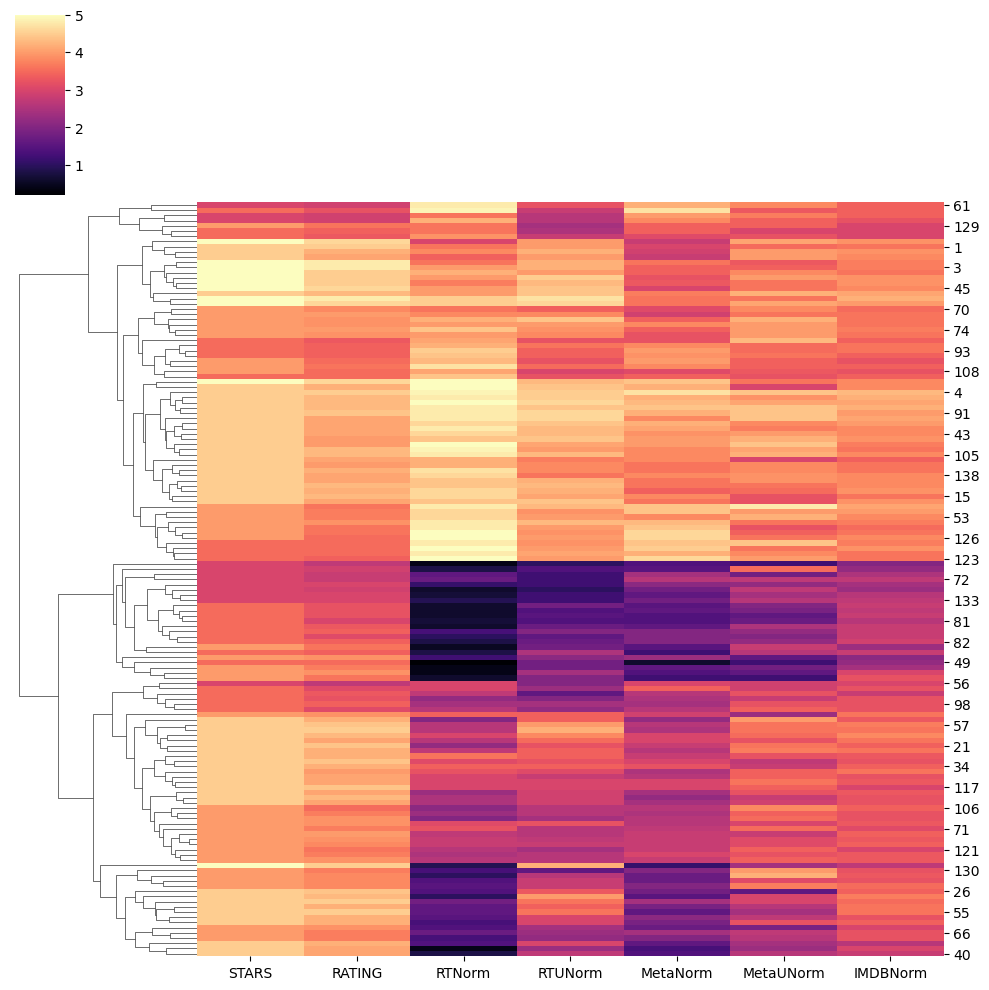

In [212]:
sns.clustermap(data=norm,cmap='magma',col_cluster=False)

TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.



In [213]:
normfile=df[['STARS','RATING','RTNorm','RTUNorm','MetaNorm','MetaUNorm','IMDBNorm','FILM']]

In [214]:
normfile.nsmallest(10,'RTNorm')

,STARS,RATING,RTNorm,RTUNorm,MetaNorm,MetaUNorm,IMDBNorm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.

<Axes: ylabel='Density'>

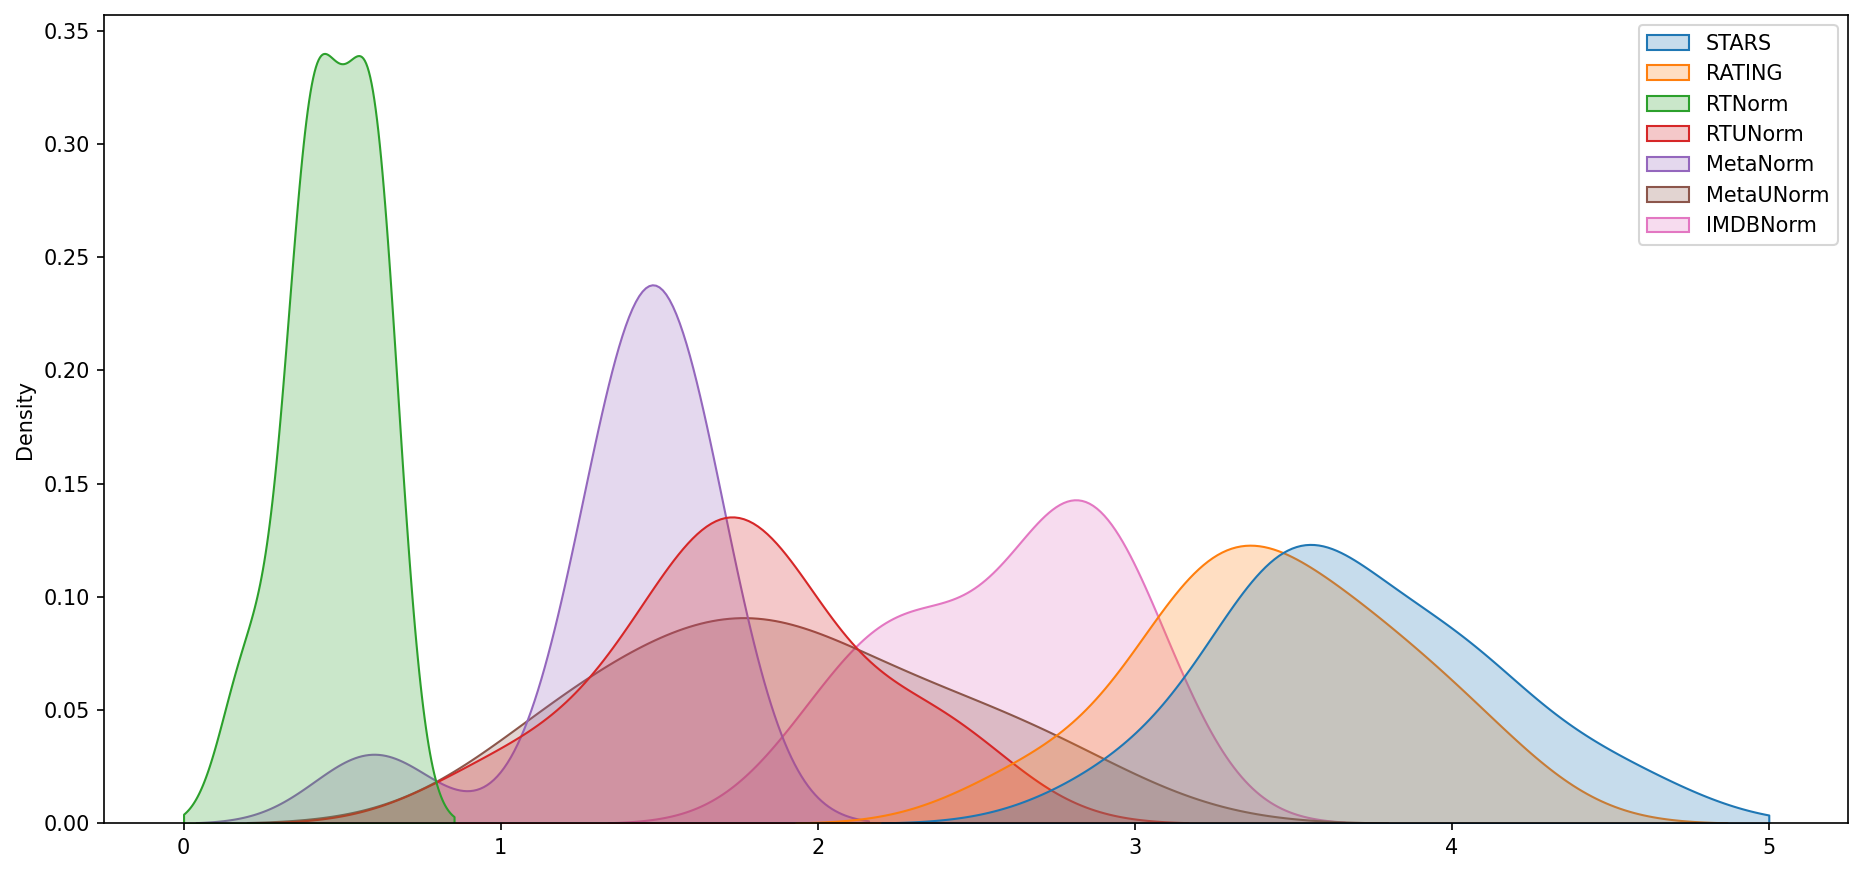

In [224]:
plt.figure(figsize=(15,7),dpi=150)
worstfilm=normfile.nsmallest(10,'RTNorm').drop('FILM',axis=1)
sns.kdeplot(data=worstfilm, clip=[0,5], fill=True)

THANK YOU